## LOADING DATA

### TMDb: Top 100 most popular English-language films by year (2014- 10th Aug 2024) ###

In [1]:
import pandas as pd
import json
import pprint

data = ''

with open('all_test.json', 'r') as openfile:

    data = json.load(openfile)

data_formatted = json.dumps(data, indent=1)

#print(data_formatted)

df_all = pd.json_normalize(data)
df_all.head(1)
#print(len(df))  #use to check no. of records 

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/xjotE7aFdZ0D8aGriYjFOtDayct.jpg,"[14, 12, 28, 10751, 10749]",102651,en,Maleficent,"A beautiful, pure-hearted young woman, Malefic...",261.627,/bDG3yei6AJlEAK3A5wN7RwFXQ7V.jpg,2014-05-28,Maleficent,False,7.092,12903


## CLEANING DATA ##

#### Inspecting the data ####

In [2]:
print(df_all.shape)
print(df_all.describe)
print(df_all.dtypes)

(1100, 14)
<bound method NDFrame.describe of       adult                     backdrop_path                   genre_ids  \
0     False  /xjotE7aFdZ0D8aGriYjFOtDayct.jpg  [14, 12, 28, 10751, 10749]   
1     False  /xJHokMbljvjADYdit5fK5VQsXEG.jpg               [12, 18, 878]   
2     False  /vFm4pF0BgaWPj0i2zEiZO6TqEQ0.jpg                    [53, 28]   
3     False  /4s2d3xdyqotiVNHTlTlJjrr3q0H.jpg     [12, 10751, 16, 28, 35]   
4     False  /vHJlbhsXrZ5yrO2KqCbGSIU6fRX.jpg         [28, 9648, 878, 53]   
...     ...                               ...                         ...   
1095  False  /4CcUgdiGe83MeqJW1NyJVmZqRrF.jpg                 [10749, 18]   
1096  False  /77Fqz6PFCSnWySDOmEL6ZPcaYIl.jpg                 [10749, 35]   
1097  False  /rz8GGX5Id2hCW1KzAIY4xwbQw1w.jpg                [28, 35, 80]   
1098  False  /sNBnCmF1ueoERa4uW5kh929KkRO.jpg                    [18, 27]   
1099  False  /mvDMt3JZ5zlsrXduGzj9jBEfVBT.jpg                [27, 53, 80]   

           id original_languag

#### Dropping unwanted columns and saving as DF ####

In [3]:
df = df_all.drop(['adult','backdrop_path', 'poster_path', 'video', 'original_language'],axis=1) 
df.head(1)

,genre_ids,id,original_title,overview,popularity,release_date,title,vote_average,vote_count
0,"[14, 12, 28, 10751, 10749]",102651,Maleficent,"A beautiful, pure-hearted young woman, Malefic...",261.627,2014-05-28,Maleficent,7.092,12903


#### Viewing the duplicates ####

In [4]:
df[df.duplicated("id", keep=False) == True]

,genre_ids,id,original_title,overview,popularity,release_date,title,vote_average,vote_count
1075,"[80, 35, 10749]",974635,Hit Man,A mild-mannered professor moonlighting as a fa...,128.809,2024-05-16,Hit Man,6.991,635
1076,"[80, 53, 28, 12]",882059,Boy Kills World,"When his family is murdered, a deaf-mute named...",130.361,2024-04-24,Boy Kills World,6.863,394
1082,"[80, 53, 28, 12]",882059,Boy Kills World,"When his family is murdered, a deaf-mute named...",130.361,2024-04-24,Boy Kills World,6.900,394
1083,"[80, 35, 10749]",974635,Hit Man,A mild-mannered professor moonlighting as a fa...,128.809,2024-05-16,Hit Man,6.991,635


### De-duping by film id ###

In [5]:
#De-dupe based on film id. 
deduped_df = df.drop_duplicates(subset=["id"], keep='first')
deduped_df.head(3)
df=deduped_df
#df.shape

### TRANSFORMING DATA ###

### Formatting the genre_ids column ###

In [6]:
##Do not run this block multiple times - it will keep slicing items from the first column. 
df['genre_ids'] = df['genre_ids'].astype("string") #converting genre_ids list-like objects to strings
df['genre_ids'] = df['genre_ids'].str.slice(1,-1) #removing the []
df.head(2)
#df.shape

,genre_ids,id,original_title,overview,popularity,release_date,title,vote_average,vote_count
0,"14, 12, 28, 10751, 10749",102651,Maleficent,"A beautiful, pure-hearted young woman, Malefic...",261.627,2014-05-28,Maleficent,7.092,12903
1,"12, 18, 878",157336,Interstellar,The adventures of a group of explorers who mak...,184.458,2014-11-05,Interstellar,8.439,34862


### Splitting the genre ids out into their own columns ###

In [7]:
#df['genre_ids'].apply(type) #finding what type of data I am dealing with in the genre_ids cells (list-like object)

split_columns = df['genre_ids'].str.split(', ', expand=True)
split_columns.columns = [f'genre_{i+1}' for i in range(split_columns.shape[1])]
df_genres = pd.concat([df, split_columns], axis=1)

df_genres.head(2)
#df_genres.shape




,genre_ids,id,original_title,overview,popularity,release_date,title,vote_average,vote_count,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,"14, 12, 28, 10751, 10749",102651,Maleficent,"A beautiful, pure-hearted young woman, Malefic...",261.627,2014-05-28,Maleficent,7.092,12903,14,12,28,10751,10749,<NA>,<NA>
1,"12, 18, 878",157336,Interstellar,The adventures of a group of explorers who mak...,184.458,2014-11-05,Interstellar,8.439,34862,12,18,878,<NA>,<NA>,<NA>,<NA>


### Adding a Release Year and Release Month column ###

In [8]:
## do not set astype(int) -- later blocks rely on this being a string. 
df_genres['release_year']= df_genres['release_date'].str[:4]
df_genres['release_month'] = df_genres['release_date'].str[5:7]
df_genres.head(2)
#df_genres.shape

,genre_ids,id,original_title,overview,popularity,release_date,title,vote_average,vote_count,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,release_year,release_month
0,"14, 12, 28, 10751, 10749",102651,Maleficent,"A beautiful, pure-hearted young woman, Malefic...",261.627,2014-05-28,Maleficent,7.092,12903,14,12,28,10751,10749,<NA>,<NA>,2014,05
1,"12, 18, 878",157336,Interstellar,The adventures of a group of explorers who mak...,184.458,2014-11-05,Interstellar,8.439,34862,12,18,878,<NA>,<NA>,<NA>,<NA>,2014,11


## DATA ANALYSIS ##

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Which Genres Feature in Each Year's 100 Most Popular Films (TMDb)? ###
#### First, create a dictionary of data ####

In [10]:
##line chart showing trends for each genre by year.
#1 count the number of occurrences for each genre per year

##Function iterates through each year's records, creating a dictionary to count how many times each genre features in the films for that year. 
def update_genre_occurrences(df_genres, years):

    genre_count_by_year = {}
    
    for year in years:
        genre_count = {}
        # Filter the DataFrame for the specified year
        year_data = df_genres.loc[(df_genres['release_year'] == str(year))]

        for i, r in year_data.iterrows():
            
            genres = [r['genre_1'], r['genre_2'], r['genre_3'], r['genre_4'], r['genre_5'], r['genre_6'], r['genre_7']]
        
            for g in genres:
                g_str = str(g)
                if g_str == '<NA>':
                    continue
                if g_str not in genre_count.keys():
                    genre_count[g_str] = 0
                genre_count[g_str] += 1

        genre_count_by_year[str(year)] = genre_count

    return genre_count_by_year
        
        

years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
occurrences = update_genre_occurrences(df_genres, years)
pprint.pprint(occurrences) #prints dictionary where Key = year and Value = dictionary of genre:count. 

{'2014': {'10402': 1,
          '10749': 7,
          '10751': 15,
          '10752': 5,
          '12': 29,
          '14': 10,
          '16': 11,
          '18': 33,
          '27': 13,
          '28': 39,
          '35': 26,
          '36': 1,
          '37': 2,
          '53': 32,
          '80': 13,
          '878': 18,
          '9648': 9},
 '2015': {'10402': 3,
          '10749': 8,
          '10751': 20,
          '10752': 2,
          '10770': 1,
          '12': 33,
          '14': 12,
          '16': 14,
          '18': 24,
          '27': 13,
          '28': 39,
          '35': 35,
          '36': 1,
          '37': 3,
          '53': 30,
          '80': 16,
          '878': 20,
          '9648': 7,
          '99': 2},
 '2016': {'10402': 5,
          '10749': 7,
          '10751': 19,
          '10752': 5,
          '10770': 1,
          '12': 43,
          '14': 19,
          '16': 13,
          '18': 34,
          '27': 11,
          '28': 44,
          '35': 30,
        

#### Convert the dictionary into a DF ####

In [11]:
## Converting dictionary into DF, making it more readable.
occurrences_df = pd.DataFrame(occurrences) 
occurrences_df = occurrences_df.reset_index() 
occurrences_df = occurrences_df.rename(columns={'index':'genre_id'})
occurrences_df = occurrences_df.fillna(0)
occurrences_df = occurrences_df.astype({'2014':'int'})

## Adding a total sum column and sorting by it to make it easier to see which genres are most popular overall
cols = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
occurrences_df['Total'] = occurrences_df[cols].sum(axis=1)

display(occurrences_df.sort_values('Total', ascending=False))


,genre_id,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
2,28,39,39,44.0,44.0,46.0,34.0,38,40.0,38,48.0,41.0,451.0
1,12,29,33,43.0,32.0,37.0,34.0,20,37.0,29,28.0,18.0,340.0
7,53,32,30,23.0,28.0,31.0,30.0,27,33.0,29,33.0,30.0,326.0
9,35,26,35,30.0,31.0,25.0,33.0,31,30.0,29,23.0,26.0,319.0
5,18,33,24,34.0,29.0,20.0,34.0,29,20.0,18,18.0,18.0,277.0
14,27,13,13,11.0,15.0,20.0,20.0,20,20.0,22,27.0,27.0,208.0
6,878,18,20,12.0,19.0,25.0,15.0,18,25.0,18,21.0,17.0,208.0
3,10751,15,20,19.0,21.0,6.0,24.0,19,17.0,19,15.0,13.0,188.0
0,14,10,12,19.0,15.0,15.0,19.0,19,14.0,18,12.0,11.0,164.0
8,16,11,14,13.0,16.0,5.0,13.0,13,17.0,14,13.0,15.0,144.0


In [12]:
#Creating DF of genre_ids and their names
genre_ids=[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 16, "name": "Animation"}, {"id": 35, "name": "Comedy"}, {"id": 80, "name": "Crime"}, {"id": 99, "name": "Documentary"}, {"id": 18, "name": "Drama"}, {"id": 10751, "name": "Family"}, {"id": 14, "name": "Fantasy"}, {"id": 36, "name": "History"}, {"id": 27, "name": "Horror"}, {"id": 10402, "name": "Music"}, {"id": 9648, "name": "Mystery"}, {"id": 10749, "name": "Romance"}, {"id": 878, "name": "Science Fiction"}, {"id": 10770, "name": "TV Movie"}, {"id": 53, "name": "Thriller"}, {"id": 10752, "name": "War"}, {"id": 37, "name": "Western"}]

genre_id = pd.DataFrame(genre_ids)
genre_id['id'] = genre_id['id'].astype("int")
display(genre_id)
print(type(genre_id['id']))
#print(genre_id.dtypes)

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


<class 'pandas.core.series.Series'>


## DATA VISUALISATION ##
#### Plot data into a line graph #### 

In [13]:
## Melt the occurrences_df into a DF suitable for line graph

occurrence_melt = occurrences_df.melt(id_vars=['genre_id'], value_vars=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'])

display(occurrence_melt)

,genre_id,variable,value
0,14,2014,10.0
1,12,2014,29.0
2,28,2014,39.0
3,10751,2014,15.0
4,10749,2014,7.0
...,...,...,...
204,27,2024,27.0
205,10402,2024,1.0
206,37,2024,1.0
207,10770,2024,0.0


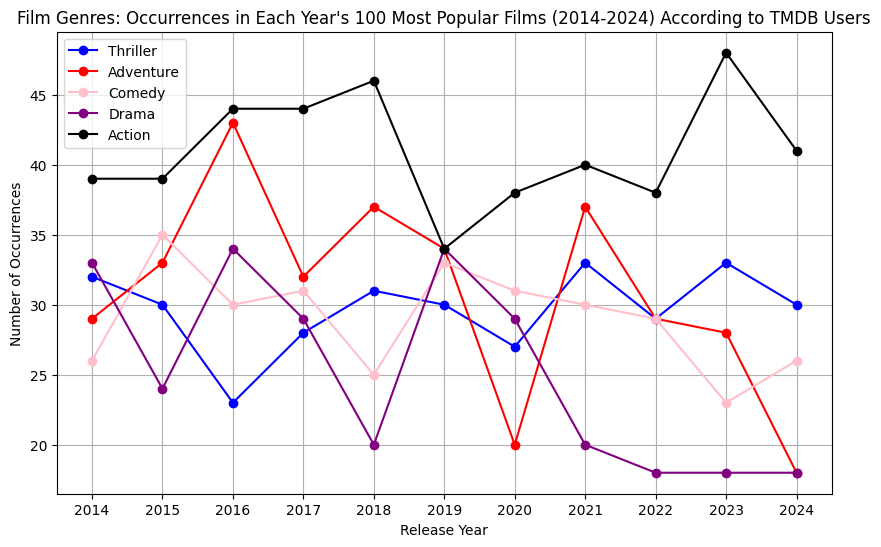

In [14]:
## plot line graph
## plotting multiple lines
plt.figure(figsize=(10, 6))
plt.plot('variable', 'value', data=occurrence_melt.loc[(occurrence_melt['genre_id'] == '53')], marker='o', linestyle='-', color='b')
plt.plot('variable', 'value', data=occurrence_melt.loc[(occurrence_melt['genre_id'] == '12')], marker='o', linestyle='-', color='r')
plt.plot('variable', 'value', data=occurrence_melt.loc[(occurrence_melt['genre_id'] == '35')], marker='o', linestyle='-', color='pink')
plt.plot('variable', 'value', data=occurrence_melt.loc[(occurrence_melt['genre_id'] == '18')], marker='o', linestyle='-', color='purple')
plt.plot('variable', 'value', data=occurrence_melt.loc[(occurrence_melt['genre_id'] == '28')], marker='o', linestyle='-', color='black')

# Add titles and labels
plt.title("Film Genres: Occurrences in Each Year's 100 Most Popular Films (2014-2024) According to TMDB Users")
plt.xlabel('Release Year')
plt.ylabel('Number of Occurrences')
plt.legend(['Thriller', 'Adventure','Comedy', 'Drama', 'Action'])


# Display grid
plt.grid(True)

# Show the plot
plt.draw()

plt.savefig('genre_line_graph.png', dpi=300, bbox_inches='tight')


## DATA ANALYSIS ##
#### Which genre is most popular? ####

In [15]:
## Sorting films by popularity and attaching a rank to them
df_sorted = df_genres.sort_values('popularity', ascending=False)
df_sorted['Rank'] = range(1, len(df_sorted) + 1)
display(df_sorted.head(2))
#df_sorted.shape

,genre_ids,id,original_title,overview,popularity,release_date,title,vote_average,vote_count,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,release_year,release_month,Rank
1000,"28, 35, 878",533535,Deadpool & Wolverine,A listless Wade Wilson toils away in civilian ...,11132.622,2024-07-24,Deadpool & Wolverine,7.901,1599,28,35,878,<NA>,<NA>,<NA>,<NA>,2024,07,1
1002,"16, 10751, 35, 28",519182,Despicable Me 4,"Gru and Lucy and their girls—Margo, Edith and ...",3155.341,2024-06-20,Despicable Me 4,7.352,785,16,10751,35,28,<NA>,<NA>,<NA>,2024,06,2


In [16]:
#Creating a dictionary showing the rankings for each genre. 
#each genre is a key, each value is the rank attached to each film that lists that genre. 

genre_rank = {}

for i, r in df_sorted.iterrows(): #iterate over each row of df_sorted 
    
    rank = int(r['Rank'])
    genres = [r['genre_1'], r['genre_2'], r['genre_3'], r['genre_4'], r['genre_5'], r['genre_6'], r['genre_7']]

    for g in genres: #for each item in the genre_1, genre_2 etc columns
        g_str = str(g)
        if g_str == '<NA>': #if column is empty, continue
            continue
        if g_str not in genre_rank.keys(): #if the genre no.  has not yet been added to the genre_rank dictionary, add it
            genre_rank[g_str] = []
        genre_rank[g_str].append(rank) #Then, add the rank no. to the dictionary as a value to go with the genre key

pprint.pprint(genre_rank)

{'10402': [106,
           178,
           185,
           189,
           202,
           330,
           339,
           357,
           395,
           423,
           443,
           458,
           484,
           535,
           541,
           641,
           651,
           691,
           738,
           745,
           829,
           834,
           930,
           1022,
           1087,
           1090,
           1095],
 '10749': [17,
           56,
           74,
           90,
           91,
           104,
           114,
           133,
           139,
           150,
           185,
           189,
           196,
           198,
           207,
           210,
           223,
           226,
           231,
           255,
           275,
           278,
           280,
           284,
           302,
           310,
           324,
           325,
           330,
           338,
           344,
           355,
           365,
           366,
           385,
        

In [17]:
#Calculate the mean rank for each genre to find out which is most popular overall (lowest no is most popular as ranking is ascending). 
mean_rank = {}
popularity_score = {}

for k, v in genre_rank.items():
    mean_rank[k] = sum(v)/len(v)
    popularity_score[k] = len(df_sorted) - sum(v)/len(v) 
    # films with a lower rank are more popular, so popularity score subtracts mean_rank from the total number of ranked entries 
    # to give a measure that is easier to visualise (higher number = more popular)


print(mean_rank)
print(popularity_score)

{'28': 504.21286031042126, '35': 570.0658307210032, '878': 453.94711538461536, '16': 506.02777777777777, '10751': 524.9734042553191, '80': 609.8642857142858, '53': 583.1134969325153, '12': 491.50882352941176, '27': 561.5961538461538, '18': 603.3249097472924, '36': 539.09375, '9648': 682.1958762886597, '10752': 508.6666666666667, '14': 527.0, '10749': 566.7096774193549, '10770': 580.7, '10402': 574.7407407407408, '37': 641.1428571428571, '99': 740.5}
{'28': 593.7871396895787, '35': 527.9341692789968, '878': 644.0528846153846, '16': 591.9722222222222, '10751': 573.0265957446809, '80': 488.13571428571424, '53': 514.8865030674847, '12': 606.4911764705882, '27': 536.4038461538462, '18': 494.6750902527076, '36': 558.90625, '9648': 415.80412371134025, '10752': 589.3333333333333, '14': 571.0, '10749': 531.2903225806451, '10770': 517.3, '10402': 523.2592592592592, '37': 456.8571428571429, '99': 357.5}


In [18]:
#create DF from dictionary of mean_rank. Transpose it and add an index column. 
genre_popularity_mean = pd.DataFrame([mean_rank, popularity_score])
genre_popularity_mean = genre_popularity_mean.T
genre_popularity_mean.reset_index(inplace=True)
genre_popularity_mean.columns = ['id', 'Mean Rank', 'Popularity Score']
genre_popularity_mean['id'] = genre_popularity_mean['id'].astype("int")

genre_popularity_mean.head(5)
#print(genre_popularity_mean.dtypes)

,id,Mean Rank,Popularity Score
0,28,504.212860,593.787140
1,35,570.065831,527.934169
2,878,453.947115,644.052885
3,16,506.027778,591.972222
4,10751,524.973404,573.026596


In [19]:
#merging the DFs: genre_ids, genre names and genre mean rank
genre_merge = pd.merge(genre_popularity_mean, genre_id, left_on='id', right_on='id')
display(genre_merge)


,id,Mean Rank,Popularity Score,name
0,28,504.212860,593.787140,Action
1,35,570.065831,527.934169,Comedy
2,878,453.947115,644.052885,Science Fiction
3,16,506.027778,591.972222,Animation
4,10751,524.973404,573.026596,Family
5,80,609.864286,488.135714,Crime
6,53,583.113497,514.886503,Thriller
7,12,491.508824,606.491176,Adventure
8,27,561.596154,536.403846,Horror
9,18,603.324910,494.675090,Drama


In [20]:
## sort genres by popularity according to their mean rank (least to most popular)
genres_sorted = genre_merge.sort_values('Mean Rank', ascending=False)
print(genres_sorted)

       id   Mean Rank  Popularity Score             name
18     99  740.500000        357.500000      Documentary
11   9648  682.195876        415.804124          Mystery
17     37  641.142857        456.857143          Western
5      80  609.864286        488.135714            Crime
9      18  603.324910        494.675090            Drama
6      53  583.113497        514.886503         Thriller
15  10770  580.700000        517.300000         TV Movie
16  10402  574.740741        523.259259            Music
1      35  570.065831        527.934169           Comedy
14  10749  566.709677        531.290323          Romance
8      27  561.596154        536.403846           Horror
10     36  539.093750        558.906250          History
13     14  527.000000        571.000000          Fantasy
4   10751  524.973404        573.026596           Family
12  10752  508.666667        589.333333              War
3      16  506.027778        591.972222        Animation
0      28  504.212860        59

## DATA VISUALISATION ## 

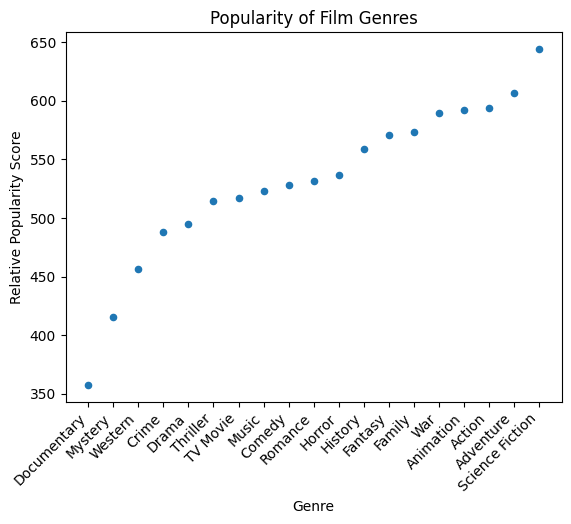

In [21]:
##Scatter Plot to show mean ranking for film genres. Inverted yaxis so it makes more sense visually (ie. more popular genres shown higher)
genres_sorted.plot.scatter(x='name', y = 'Popularity Score', title = 'Popularity of Film Genres')
plt.ylabel("Relative Popularity Score")
plt.xlabel("Genre")
# # Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.draw()
plt.savefig('popularity_scatter_graph.png')

## LOADING DATA 
#### TMDb: Top 200 most-popular people and their associated films ####

In [22]:
data = ''

with open('people_test.json', 'r') as openfile:

    data = json.load(openfile)

data_formatted = json.dumps(data, indent=1)

#print(data_formatted)

df_all = pd.json_normalize(data)
df_all = df_all.rename(columns={'id':'actor_id'})
df_all.head(2)
#df_all.shape
#print(df_all.dtypes)
#df_all.describe

## the 'known_for' column relates to the film id. 

,adult,gender,actor_id,known_for_department,name,original_name,popularity,profile_path,known_for
0,False,2,64,Acting,Gary Oldman,Gary Oldman,257.123,/2v9FVVBUrrkW2m3QOcYkuhq9A6o.jpg,"[155, 49026, 399404]"
1,False,2,1914924,Acting,Miles Wei,魏哲鳴,198.182,/w5j6lrywnUC0OBHPp6QZF4XJRfg.jpg,"[128926, 110966, 98830]"


## CLEANING DATA ##
#### Dropping unwanted columns, deduping & formatting known_for ####

In [23]:
df = df_all.drop(['adult','profile_path'],axis=1) 
df.head(2)

,gender,actor_id,known_for_department,name,original_name,popularity,known_for
0,2,64,Acting,Gary Oldman,Gary Oldman,257.123,"[155, 49026, 399404]"
1,2,1914924,Acting,Miles Wei,魏哲鳴,198.182,"[128926, 110966, 98830]"


In [24]:
deduped_df = df.drop_duplicates(subset=["actor_id"], keep='first')
deduped_df.head(2)
df=deduped_df
#df.shape

In [25]:
df['known_for'] = df['known_for'].astype("string") #converting film ids in 'known_for' from list-like objects to strings
df['known_for'] = df['known_for'].str.slice(1,-1) #removing the []
df.head(2)

,gender,actor_id,known_for_department,name,original_name,popularity,known_for
0,2,64,Acting,Gary Oldman,Gary Oldman,257.123,"155, 49026, 399404"
1,2,1914924,Acting,Miles Wei,魏哲鳴,198.182,"128926, 110966, 98830"


#### View contents of 'known_for_department' #### 

In [26]:
filtered = df[df['known_for_department'] != 'Acting']
display(filtered)

,gender,actor_id,known_for_department,name,original_name,popularity,known_for
126,2,1215399,Writing,Taylor Sheridan,Taylor Sheridan,66.024,"273481, 395834, 338766"
151,2,16847,Directing,Eli Roth,Eli Roth,63.675,"1690, 263472, 395990"


#### Drop non-actor records ####

In [27]:
df = df[df['known_for_department'] != 'Writing']
df = df[df['known_for_department'] != 'Directing']
#df_check = df[df['known_for_department'] != 'Acting']
#display(df_check)

## TRANSFORMING DATA ##

#### Separate known_for out into columns & convert to integers ####

In [28]:
#df['known_for'].apply(type) #finding what type of data I am dealing with in the known_for column: strings.

split_columns = df['known_for'].str.split(', ', expand=True)
split_columns.columns = [f'film_{i+1}' for i in range(split_columns.shape[1])]
df_actors = pd.concat([df, split_columns], axis=1)
df_actors[['film_1', 'film_2', 'film_3']] = df_actors[['film_1', 'film_2', 'film_3']].apply(pd.to_numeric)

df_actors.head(2)
#df_actors.shape


,gender,actor_id,known_for_department,name,original_name,popularity,known_for,film_1,film_2,film_3
0,2,64,Acting,Gary Oldman,Gary Oldman,257.123,"155, 49026, 399404",155,49026,399404
1,2,1914924,Acting,Miles Wei,魏哲鳴,198.182,"128926, 110966, 98830",128926,110966,98830


#### Streamline the actor dataset to make it easier to work with ####

In [29]:
df_actors = df_actors [['name', 'gender', 'popularity', 'film_1', 'film_2', 'film_3']]
display(df_actors.head(3))

,name,gender,popularity,film_1,film_2,film_3
0,Gary Oldman,2,257.123,155,49026,399404
1,Miles Wei,2,198.182,128926,110966,98830
2,Daiki Nakamura,2,178.837,8392,31910,21729


In [30]:
df_actors = df_actors.copy()
df_actors.loc[df_actors['gender'] == 1, 'gender'] = 'Female'
df_actors.loc[df_actors['gender'] == 2, 'gender'] = 'Male'
df_actors.loc[df_actors['gender'] == 3, 'gender'] = 'Non-binary'
print(df_actors.head(5))

                 name  gender  popularity  film_1  film_2  film_3
0         Gary Oldman    Male     257.123     155   49026  399404
1           Miles Wei    Male     198.182  128926  110966   98830
2      Daiki Nakamura    Male     178.837    8392   31910   21729
3  Scarlett Johansson  Female     150.789  240832  497698  315837
4       Ryan Reynolds    Male     149.928  293660  383498  550988


C:\Users\lanef\AppData\Local\Temp\ipykernel_23236\2797544504.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_actors.loc[df_actors['gender'] == 1, 'gender'] = 'Female'


## DATA ANALYSIS ##
#### Sorting by popularity (most - least) ####

In [30]:
df_actors.sort_values('popularity', axis = 0, ascending = False).head(5)

,name,gender,popularity,film_1,film_2,film_3
0,Gary Oldman,2,257.123,155,49026,399404
1,Miles Wei,2,198.182,128926,110966,98830
2,Daiki Nakamura,2,178.837,8392,31910,21729
3,Scarlett Johansson,1,150.789,240832,497698,315837
4,Ryan Reynolds,2,149.928,293660,383498,550988


## FURTHER DATA TRANSFORMATION ##
#### Merge actor and film datasets together ####

In [31]:
film_actor_merge1 = pd.merge(df_actors, df_genres, how='left', left_on='film_1', right_on='id')
display(film_actor_merge1.head(5))
film_actor_merge1.shape

,name,gender,popularity_x,film_1,film_2,film_3,genre_ids,id,original_title,overview,...,vote_count,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,release_year,release_month
0,Gary Oldman,2,257.123,155,49026,399404,<NA>,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
1,Miles Wei,2,198.182,128926,110966,98830,<NA>,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2,Daiki Nakamura,2,178.837,8392,31910,21729,<NA>,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
3,Scarlett Johansson,1,150.789,240832,497698,315837,"28, 878",240832.0,Lucy,"A woman, accidentally caught in a dark deal, t...",...,15760.0,28,878,<NA>,<NA>,<NA>,<NA>,<NA>,2014,07
4,Ryan Reynolds,2,149.928,293660,383498,550988,"28, 12, 35",293660.0,Deadpool,The origin story of former Special Forces oper...,...,30439.0,28,12,35,<NA>,<NA>,<NA>,<NA>,2016,02


(198, 24)

In [32]:
film_actor_merge2 = pd.merge(film_actor_merge1, df_genres, how='left', left_on='film_2', right_on='id', suffixes = ('', '_2'))
display(film_actor_merge2.head(5))
film_actor_merge2.shape

,name,gender,popularity_x,film_1,film_2,film_3,genre_ids,id,original_title,overview,...,vote_count_2,genre_1_2,genre_2_2,genre_3_2,genre_4_2,genre_5_2,genre_6_2,genre_7_2,release_year_2,release_month_2
0,Gary Oldman,2,257.123,155,49026,399404,<NA>,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
1,Miles Wei,2,198.182,128926,110966,98830,<NA>,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2,Daiki Nakamura,2,178.837,8392,31910,21729,<NA>,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
3,Scarlett Johansson,1,150.789,240832,497698,315837,"28, 878",240832.0,Lucy,"A woman, accidentally caught in a dark deal, t...",...,9961.0,28,12,878,<NA>,<NA>,<NA>,<NA>,2021,07
4,Ryan Reynolds,2,149.928,293660,383498,550988,"28, 12, 35",293660.0,Deadpool,The origin story of former Special Forces oper...,...,17477.0,28,35,12,<NA>,<NA>,<NA>,<NA>,2018,05


(198, 42)

In [33]:
film_actor_merge3 = pd.merge(film_actor_merge2, df_genres, how='left', left_on='film_3', right_on='id', suffixes = ('', '_3'))
display(film_actor_merge3.head(2))
film_actor_merge3.shape

,name,gender,popularity_x,film_1,film_2,film_3,genre_ids,id,original_title,overview,...,vote_count_3,genre_1_3,genre_2_3,genre_3_3,genre_4_3,genre_5_3,genre_6_3,genre_7_3,release_year_3,release_month_3
0,Gary Oldman,2,257.123,155,49026,399404,<NA>,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
1,Miles Wei,2,198.182,128926,110966,98830,<NA>,NaN,NaN,NaN,...,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN


(198, 60)

#### View final merge and print all columns in full. Rename columns. ####

In [34]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
film_actor_df = film_actor_merge3
film_actor_df = film_actor_df.rename(columns={"popularity_x": "Actor_popularity", "id":"f1_id", "popularity_y":"f1_popularity", "id_2":"f2_id", "popularity":"f2_popularity", "id_3":"f3_id", "popularity_3":"f3_popularity"})
film_actor_df.head(3)

#film_actor_df.sort_values('gender')
#film_actor_df.loc[(film_actor_df['gender'] == 3)].head(5)

,name,gender,Actor_popularity,film_1,film_2,film_3,genre_ids,f1_id,original_title,overview,f1_popularity,release_date,title,vote_average,vote_count,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,release_year,release_month,genre_ids_2,f2_id,original_title_2,overview_2,f2_popularity,release_date_2,title_2,vote_average_2,vote_count_2,genre_1_2,genre_2_2,genre_3_2,genre_4_2,genre_5_2,genre_6_2,genre_7_2,release_year_2,release_month_2,genre_ids_3,f3_id,original_title_3,overview_3,f3_popularity,release_date_3,title_3,vote_average_3,vote_count_3,genre_1_3,genre_2_3,genre_3_3,genre_4_3,genre_5_3,genre_6_3,genre_7_3,release_year_3,release_month_3
0,Gary Oldman,2,257.123,155,49026,399404,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
1,Miles Wei,2,198.182,128926,110966,98830,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2,Daiki Nakamura,2,178.837,8392,31910,21729,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN


#### DATA VISUALISATION ####

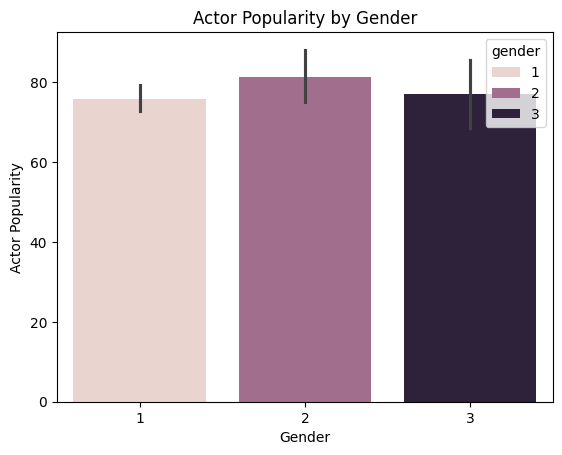

In [35]:
## What are the genders of the most popular actors?
labels= ['Male', 'Female', 'Non-binary']
ax = sns.barplot(x='gender', y='Actor_popularity', hue = 'gender', data = film_actor_df).set(title='Actor Popularity by Gender', xlabel='Gender', ylabel = 'Actor Popularity')

plt.draw()

plt.savefig('gender_popularity_bar.png')



## LOADING DATA

### IMDb: Top 1000 IMDB rated English-language films ###

In [36]:
imdb_df = pd.read_csv('imdb_top_1000_clean.csv')
imdb_df.head(10)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
6,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
7,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0
8,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0
9,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0


# Cleaning the data #

### This dataset has already been cleaned before loading into this notebook
### Looking at the shape and type of data: ###

In [37]:
imdb_df.shape


(1000, 15)

In [38]:
imdb_df.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,1.000000e+03,8.310000e+02
mean,7.949300,78.359000,2.736929e+05,6.803475e+07
std,0.275491,11.425439,3.273727e+05,1.097500e+08
min,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,7.700000,72.000000,5.552625e+04,3.253559e+06
50%,7.900000,80.000000,1.385485e+05,2.353089e+07
75%,8.100000,86.000000,3.741612e+05,8.075089e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


# Transforming the Data

### Splitting the genres and writing to a new file

In [39]:
imdb_df['Genre'] = imdb_df['Genre'].astype("string")
imdb_df[['genre_1', 'genre_2', 'genre_3']] = imdb_df['Genre'].str.strip('[]').str.split(', ', expand=True)
# print(imdb_df)
imdb_df.to_csv('cleanfile.csv', encoding = 'utf-8')

<h3>Reading the new file</h3>

In [40]:
imdb_clean_df = pd.read_csv('cleanfile.csv')
# cleanfile[['Series_Title', 'Released_Year', 'genre_1']].head(100)

<h3>Looking at the different genres in genre_1, genre_2 and genre_3</h3>

In [41]:
# Using unique()
unique_values_1 = imdb_df['genre_1'].unique()
print(unique_values_1)  

<StringArray>
[    'Drama',     'Crime',    'Action', 'Biography',   'Western',    'Comedy',
 'Adventure', 'Animation',    'Horror',   'Mystery', 'Film-Noir',   'Fantasy',
    'Family',  'Thriller']
Length: 14, dtype: string


In [42]:
unique_values_2 = imdb_df['genre_2'].unique()
print(unique_values_2)  

<StringArray>
[       <NA>,     'Drama',     'Crime', 'Adventure',   'Romance',    'Sci-Fi',
       'War',    'Family',     'Music',    'Comedy',   'Mystery', 'Biography',
    'Action',   'Western',  'Thriller',    'Horror',   'Musical', 'Film-Noir',
   'Fantasy',     'Sport',   'History']
Length: 21, dtype: string


In [43]:
unique_values_3 = imdb_df['genre_3'].unique()
print(unique_values_3)  

<StringArray>
[       <NA>,     'Drama',   'History',    'Sci-Fi',   'Fantasy',  'Thriller',
    'Family',   'Romance',   'Mystery',     'Music',       'War', 'Adventure',
    'Horror',     'Sport',    'Comedy', 'Film-Noir',     'Crime',   'Western',
   'Musical', 'Biography']
Length: 20, dtype: string


In [44]:
imdb_clean_df[['Series_Title', 'Released_Year', 'genre_1']].head(100)

,Series_Title,Released_Year,genre_1
0,The Shawshank Redemption,1994,Drama
1,The Godfather,1972,Crime
2,The Dark Knight,2008,Action
3,The Godfather: Part II,1974,Crime
4,12 Angry Men,1957,Crime
5,The Lord of the Rings: The Return of the King,2003,Action
6,Pulp Fiction,1994,Crime
7,Schindler's List,1993,Biography
8,Inception,2010,Action
9,Fight Club,1999,Drama


# Further Data Exploration 

### Creating a bar chart of all of genre_1 over the dataframe

(100, 14)


<Figure size 2000x1200 with 0 Axes>

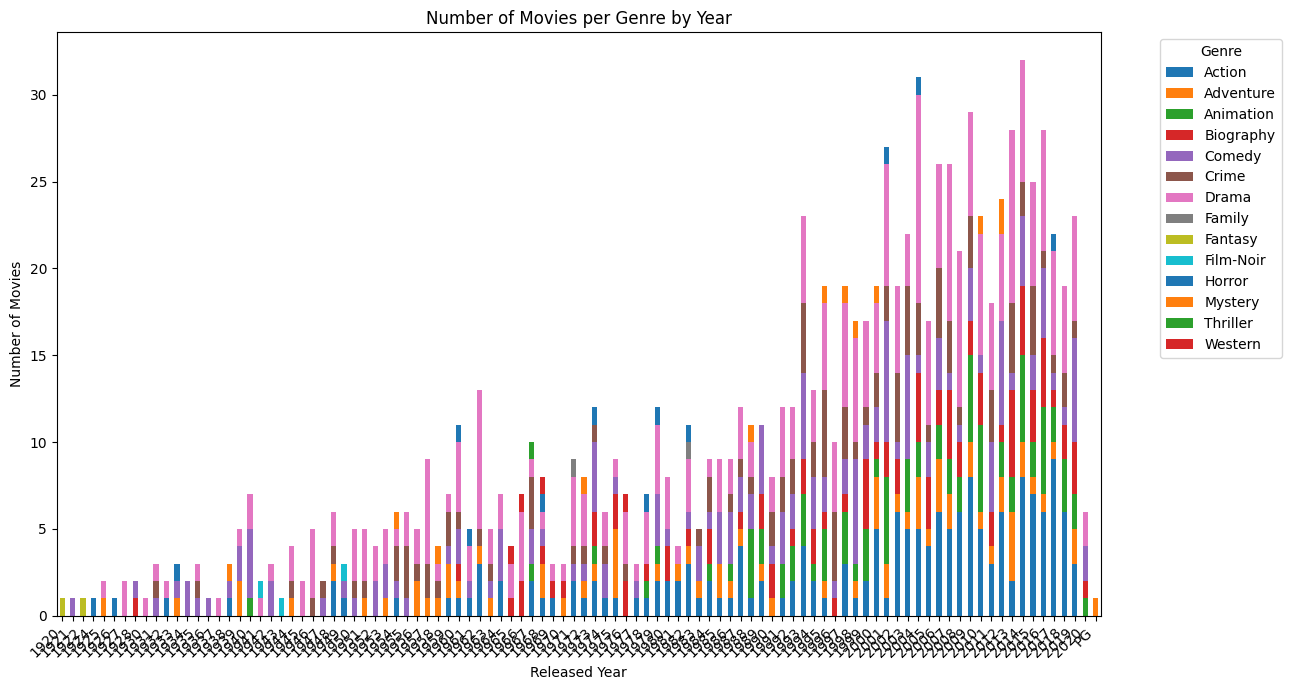

In [45]:
# Step 1: Load the DataFrame
df = pd.read_csv('cleanfile.csv')
# Step 2: Aggregate the data by 'Released_Year' and 'genre_1'
# Counting the number of occurrences for each genre per year
genre_year_count = df.groupby(['Released_Year', 'genre_1']).size().unstack(fill_value=0)

# Optional: Check the dimensions to confirm all data is included
print(genre_year_count.shape)

# Step 3: Plot the bar chart
# If the number of years is large, you might want to increase figure size
plt.figure(figsize=(20, 12))  # Adjusting figure size to fit all data

# Create the stacked bar plot
ax = genre_year_count.plot(kind='bar', stacked=True, figsize=(13, 7))

# Customizing the plot
plt.title('Number of Movies per Genre by Year')
plt.xlabel('Released Year')
plt.ylabel('Number of Movies')

# Rotate x-axis labels for better readability if there are many years
plt.xticks(rotation=45, ha="right")

# Adjust legend to fit all genres
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Display the plot
plt.show()

### There is an incorrect object in the Released_Year column

## Investigating the error

In [46]:
imdb_clean_df.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
genre_1           object
genre_2           object
genre_3           object
dtype: object

### Further Data Cleaning to allow for accurate Data Visualisation

In [47]:
# Step 1: Load the DataFrame
df = pd.read_csv('cleanfile.csv')

# Step 2: Identify non-numeric values in the 'Released_Year' column
# Use the pd.to_numeric function with errors='coerce' to convert non-numeric values to NaN
df['Released_Year_Numeric'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Step 3: Filter rows where 'Released_Year_Numeric' is NaN (indicating non-numeric original data)
non_numeric_years = df[df['Released_Year_Numeric'].isna()]

# Display the problematic rows
print(non_numeric_years[['Series_Title', 'Released_Year']])

# Step 4: (Optional) Remove these rows from the DataFrame
df_cleaned = df.dropna(subset=['Released_Year_Numeric'])

# If you want to remove the temporary 'Released_Year_Numeric' column after cleaning:
df_cleaned = df_cleaned.drop(columns=['Released_Year_Numeric'])

# Now you can convert 'Released_Year' to integers
df_cleaned['Released_Year'] = df_cleaned['Released_Year'].astype(int)

# The cleaned DataFrame is now ready for further analysis or plottingf['Released_Year'] = imdb_clean_df['Released_Year'].astype(float)

    Series_Title Released_Year
966    Apollo 13            PG


In [48]:
df_cleaned['Released_Year'].dtype

dtype('int64')

<Figure size 1600x1000 with 0 Axes>

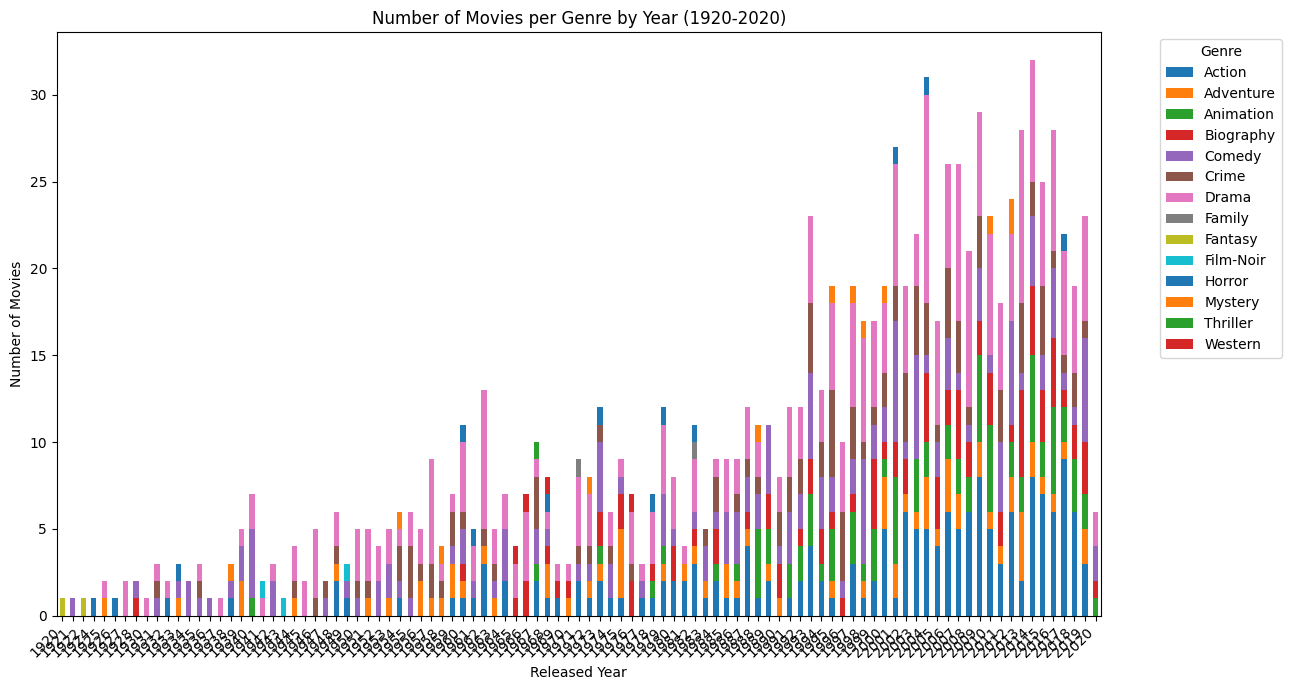

In [49]:

# Step 1: Filter the DataFrame to include only movies from 1990 to 2020
filtered_df = df_cleaned[(df_cleaned['Released_Year'] >= 1920) & (df_cleaned['Released_Year'] <= 2020)]

# Step 2: Aggregate the data by 'Released_Year' and 'genre_1'
# Counting the number of occurrences for each genre per year
genre_year_count = filtered_df.groupby(['Released_Year', 'genre_1']).size().unstack(fill_value=0)

# Step 3: Plot the bar chart
plt.figure(figsize=(16, 10))  # Increase figure size for better readability

# Create the stacked bar plot
ax = genre_year_count.plot(kind='bar', stacked=True, figsize=(13, 7))

# Customizing the plot
plt.title('Number of Movies per Genre by Year (1920-2020)')
plt.xlabel('Released Year')
plt.ylabel('Number of Movies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adjust legend to fit all genres
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Display the plot
plt.draw()
plt.savefig("100_yr_barchart.png")

## Data Analysis: Which genres of film have been produced each year?

### Creating DF that includes count of genre_1, genre_2 and genre_3 by year
#### First, create a dictionary of data

In [50]:
import pprint
#df_cleaned.head(2)
df_cleaned['Released_Year'] = df_cleaned['Released_Year'].astype(str)
#df_cleaned.dtypes

def update_genre_occurrences(df_cleaned, years):
    genre_count_by_year = {}

    for year in years:
        genre_count = {}
       
        year_data = df_cleaned.loc[df_cleaned['Released_Year'] == str(year)]

        for i, r in year_data.iterrows():
            genres = [r['genre_1'], r['genre_2'], r['genre_3']]

            for g in genres:
                g_str = str(g)
                if g_str == '<NA>' or g_str == 'nan':
                    continue
                if g_str not in genre_count.keys():
                    genre_count[g_str] = 0
                genre_count[g_str] += 1

        genre_count_by_year[str(year)] = genre_count

    return genre_count_by_year

years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'] ##edit this list according to need
occurrences = update_genre_occurrences(df_cleaned, years)
pprint.pprint(occurrences)  # Prints dictionary where Key = year and Value = dictionary of genre:count.

{'2010': {'Action': 6,
          'Adventure': 6,
          'Animation': 5,
          'Biography': 3,
          'Comedy': 5,
          'Crime': 5,
          'Drama': 14,
          'Family': 2,
          'Fantasy': 1,
          'History': 1,
          'Mystery': 2,
          'Romance': 2,
          'Sci-Fi': 1,
          'Sport': 1,
          'Thriller': 3,
          'War': 1,
          'Western': 1},
 '2011': {'Action': 3,
          'Adventure': 2,
          'Biography': 2,
          'Comedy': 5,
          'Crime': 3,
          'Drama': 15,
          'Fantasy': 2,
          'Horror': 1,
          'Music': 1,
          'Musical': 1,
          'Mystery': 1,
          'Romance': 3,
          'Sci-Fi': 1,
          'Sport': 2,
          'Thriller': 2},
 '2012': {'Action': 6,
          'Adventure': 6,
          'Animation': 2,
          'Biography': 2,
          'Comedy': 8,
          'Crime': 3,
          'Drama': 14,
          'Family': 1,
          'Fantasy': 4,
          'Music': 1,
    

### Create a DF from the dictionary that is suitable for use with a stacked bar chart

In [51]:
genre_plot = pd.DataFrame(occurrences)
genre_plot = genre_plot.reset_index() 
genre_plot = genre_plot.rename(columns={'index':'genre_name'})
genre_plot = genre_plot.fillna(0)
#genre_plot.head(4)

genre_plot_pivoted = genre_plot.melt(id_vars='genre_name', var_name='Year', value_name='Value')
#print(genre_plot_pivoted)
final_genre_plot = genre_plot_pivoted.pivot(index='Year', columns='genre_name', values='Value').reset_index()
#print(final_genre_plot)

### DATA VISUALISATION: Bar Chart showing genres attached to most popular films by year (IMDB) 2014-2024.

<Figure size 1600x1000 with 0 Axes>

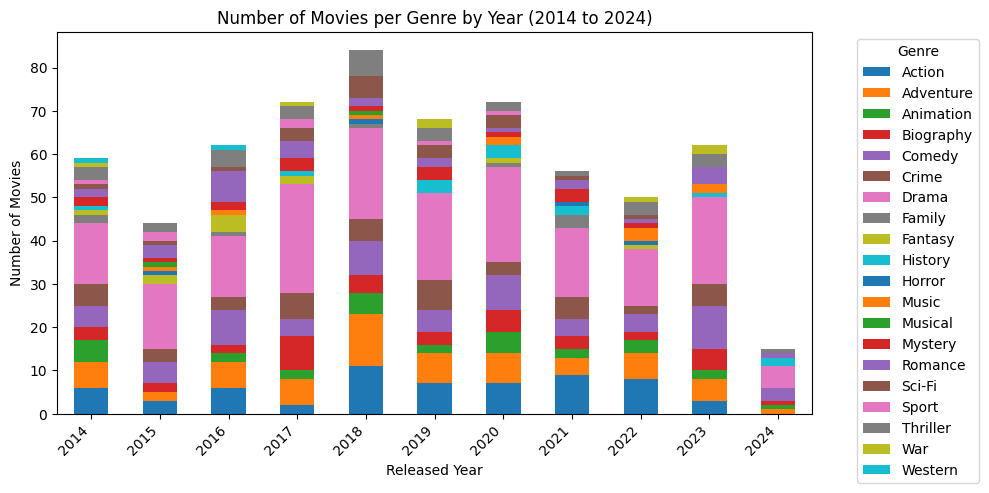

In [97]:
#final_genre_plot.plot(x = "Year", y = "value", kind = "bar", stacked = True, title = "Top Movies per Year (2014 to 2024) by Genre (from IMDB)")

#final_genre_plot.plot(kind='bar', stacked=True, figsize=(10, 7))

# # Step 4: Plot the bar chart
plt.figure(figsize=(16, 10))  # Increase figure size for better readability

# # Create the stacked bar plot
ax = final_genre_plot.plot(kind='bar', stacked=True, figsize=(10, 5))

# # Customizing the plot
plt.title('Number of Movies per Genre by Year (2014 to 2024)')
plt.xlabel('Released Year')
plt.ylabel('Number of Movies')
xticklabels = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

# # Rotate x-axis labels for better readability
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], xticklabels, rotation=45, ha="right")

# # Adjust legend to fit all genres
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# # Display the plot
plt.draw()
plt.savefig("stacked_genre_bar.png")

## What is the relationship between runtime and gross earnings?
### Loading the Data

In [54]:
imdb_clean_df = pd.read_csv('cleanfile.csv')

## Data Analysis & Visualisation

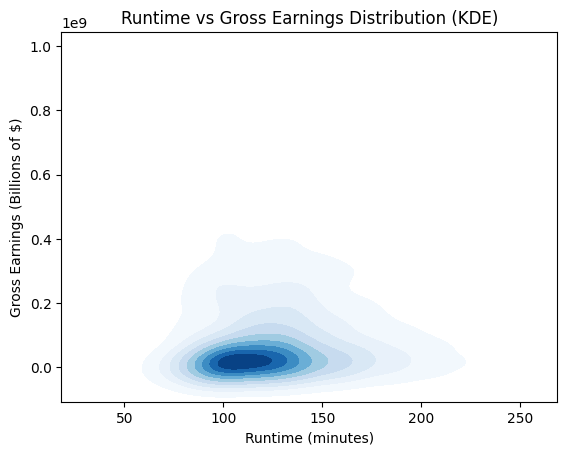

In [55]:
# Step 1: Convert 'Runtime' from string to integer
# Using .loc[] to avoid SettingWithCopyWarning
imdb_clean_df.loc[:, 'Runtime'] = imdb_clean_df['Runtime'].str.replace(' min', '', regex=False).astype(int)

# Step 2: Check and ensure 'Gross' is numeric (already assumed numeric in this case)
# imdb_clean_df['Gross'] = pd.to_numeric(imdb_clean_df['Gross'], errors='coerce')

# Drop rows with missing values in 'Runtime' or 'Gross'
imdb_clean_df = imdb_clean_df.dropna(subset=['Runtime', 'Gross'])

# Step 3: Plotting the KDE for Runtime vs Gross
sns.kdeplot(
    x=imdb_clean_df['Runtime'], 
    y=imdb_clean_df['Gross'], 
    cmap="Blues", 
    fill=True,  # Updated from shade=True to fill=True
    thresh=0.05
)

# Add a title and labels
plt.title('Runtime vs Gross Earnings Distribution (KDE)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Gross Earnings (Billions of $)')

# Show the plot
plt.draw()
plt.savefig("runtime_distribution.png")

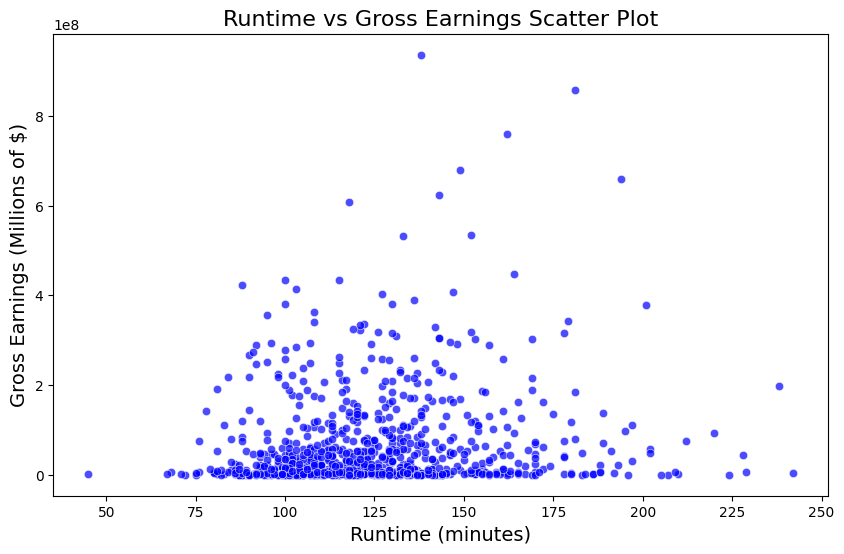

In [56]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot

sns.scatterplot(
    x=imdb_clean_df['Runtime'], 
    y=imdb_clean_df['Gross'], 
    color="blue",  # Change the color of the points
    alpha=0.7  # Adjust transparency to avoid overlap issues
)

# Add a title and labels
plt.title('Runtime vs Gross Earnings Scatter Plot', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Gross Earnings (Millions of $)', fontsize=14)

# Show the plot
plt.draw()
plt.savefig("runtime_scatter.png")

## Further Analysis: Creating a heatmap to compare correlations between the different variables ##
### Loading and exploring the data ### 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [58]:
imdb_clean_df = pd.read_csv('cleanfile.csv')

In [59]:
imdb_clean_df.head(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genre_1,genre_2,genre_3
0,0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,Drama,NaN,NaN
1,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime,Drama,NaN
2,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action,Crime,Drama
3,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime,Drama,NaN
4,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime,Drama,NaN


In [60]:
imdb_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1000 non-null   int64  
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
 16  genre_1        1000 non-null   object 
 17  genre_2        895 non-null    object 
 18  genre_3  

## Data Transformation ## 
### Most of the datatypes are objects. Some of these can be converted to integers and floats. Let's start converting the ones we can. ###

In [61]:

# Convert Released_Year to integers
imdb_clean_df['Released_Year'] = pd.to_numeric(imdb_clean_df['Released_Year'], errors='coerce').fillna(0).astype(int)

# Ensure all values in the Runtime column are strings
imdb_clean_df['Runtime'] = imdb_clean_df['Runtime'].astype(str)

# Extract the numeric part and convert to integer
imdb_clean_df['Runtime'] = imdb_clean_df['Runtime'].str.extract('(\d+)').astype(int)

# Check the data types to confirm the changes
print(imdb_clean_df.dtypes)

Unnamed: 0         int64
Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
genre_1           object
genre_2           object
genre_3           object
dtype: object


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\beccy\AppData\Local\Temp\ipykernel_27668\2494137199.py:8: SyntaxWarning: invalid escape sequence '\d'
  imdb_clean_df['Runtime'] = imdb_clean_df['Runtime'].str.extract('(\d+)').astype(int)


### Now Released_Year and Runtime are both integers. Let's start assigning numbers to other categories

### genre_1 as numeric

In [62]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the genre_1 column to assign numeric labels
imdb_clean_df['genre_1_encoded'] = label_encoder.fit_transform(imdb_clean_df['genre_1'])

# View the first few rows to check the encoding
print(imdb_clean_df[['genre_1', 'genre_1_encoded']].head())

# Check the mapping of each genre to a number
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

  genre_1  genre_1_encoded
0   Drama                6
1   Crime                5
2  Action                0
3   Crime                5
4   Crime                5
{'Action': np.int64(0), 'Adventure': np.int64(1), 'Animation': np.int64(2), 'Biography': np.int64(3), 'Comedy': np.int64(4), 'Crime': np.int64(5), 'Drama': np.int64(6), 'Family': np.int64(7), 'Fantasy': np.int64(8), 'Film-Noir': np.int64(9), 'Horror': np.int64(10), 'Mystery': np.int64(11), 'Thriller': np.int64(12), 'Western': np.int64(13)}


### genre_2 as numeric

In [63]:

# Fit and transform the genre_2 column to assign numeric labels
imdb_clean_df['genre_2_encoded'] = label_encoder.fit_transform(imdb_clean_df['genre_2'])

# View the first few rows to check the encoding
print(imdb_clean_df[['genre_2', 'genre_2_encoded']].head())

# Check the mapping of each genre to a number
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)



  genre_2  genre_2_encoded
0     NaN               20
1   Drama                5
2   Crime                4
3   Drama                5
4   Drama                5
{'Action': np.int64(0), 'Adventure': np.int64(1), 'Biography': np.int64(2), 'Comedy': np.int64(3), 'Crime': np.int64(4), 'Drama': np.int64(5), 'Family': np.int64(6), 'Fantasy': np.int64(7), 'Film-Noir': np.int64(8), 'History': np.int64(9), 'Horror': np.int64(10), 'Music': np.int64(11), 'Musical': np.int64(12), 'Mystery': np.int64(13), 'Romance': np.int64(14), 'Sci-Fi': np.int64(15), 'Sport': np.int64(16), 'Thriller': np.int64(17), 'War': np.int64(18), 'Western': np.int64(19), nan: np.int64(20)}


### genre_3 as numeric

In [64]:

# Fit and transform the genre_3 column to assign numeric labels
imdb_clean_df['genre_3_encoded'] = label_encoder.fit_transform(imdb_clean_df['genre_3'])

# View the first few rows to check the encoding
print(imdb_clean_df[['genre_3', 'genre_3_encoded']].head())

# Check the mapping of each genre to a number
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

  genre_3  genre_3_encoded
0     NaN               19
1     NaN               19
2   Drama                4
3     NaN               19
4     NaN               19
{'Adventure': np.int64(0), 'Biography': np.int64(1), 'Comedy': np.int64(2), 'Crime': np.int64(3), 'Drama': np.int64(4), 'Family': np.int64(5), 'Fantasy': np.int64(6), 'Film-Noir': np.int64(7), 'History': np.int64(8), 'Horror': np.int64(9), 'Music': np.int64(10), 'Musical': np.int64(11), 'Mystery': np.int64(12), 'Romance': np.int64(13), 'Sci-Fi': np.int64(14), 'Sport': np.int64(15), 'Thriller': np.int64(16), 'War': np.int64(17), 'Western': np.int64(18), nan: np.int64(19)}


### Director as numeric

In [65]:

# Fit and transform the director column to assign numeric labels
imdb_clean_df['director_encoded'] = label_encoder.fit_transform(imdb_clean_df['Director'])

# View the first few rows to check the encoding
print(imdb_clean_df[['Director', 'director_encoded']].head())

# Check the mapping of each genre to a number
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

               Director  director_encoded
0        Frank Darabont               141
1  Francis Ford Coppola               137
2     Christopher Nolan                83
3  Francis Ford Coppola               137
4          Sidney Lumet               456
{'Aamir Khan': np.int64(0), 'Aaron Sorkin': np.int64(1), 'Abdellatif Kechiche': np.int64(2), 'Abhishek Chaubey': np.int64(3), 'Abhishek Kapoor': np.int64(4), 'Adam Elliot': np.int64(5), 'Adam McKay': np.int64(6), 'Aditya Chopra': np.int64(7), 'Aditya Dhar': np.int64(8), 'Akira Kurosawa': np.int64(9), 'Alain Resnais': np.int64(10), 'Alan J. Pakula': np.int64(11), 'Alan Parker': np.int64(12), 'Alejandro Amenábar': np.int64(13), 'Alejandro G. Iñárritu': np.int64(14), 'Alejandro Jodorowsky': np.int64(15), 'Alex Garland': np.int64(16), 'Alex Proyas': np.int64(17), 'Alexander Mackendrick': np.int64(18), 'Alexander Payne': np.int64(19), 'Alfonso Cuarón': np.int64(20), 'Alfonso Gomez-Rejon': np.int64(21), 'Alfred Hitchcock': np.int64(22), 'Amit R

### Certificate as numeric

In [66]:

# Fit and transform the Certificate column to assign numeric labels
imdb_clean_df['certificate_encoded'] = label_encoder.fit_transform(imdb_clean_df['Certificate'])

# View the first few rows to check the encoding
print(imdb_clean_df[['Certificate', 'certificate_encoded']].head())

# Check the mapping of each genre to a number
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

  Certificate  certificate_encoded
0           A                    1
1           A                    1
2          UA                   14
3           A                    1
4           U                   12
{'16': np.int64(0), 'A': np.int64(1), 'Approved': np.int64(2), 'G': np.int64(3), 'GP': np.int64(4), 'PG': np.int64(5), 'PG-13': np.int64(6), 'Passed': np.int64(7), 'R': np.int64(8), 'TV-14': np.int64(9), 'TV-MA': np.int64(10), 'TV-PG': np.int64(11), 'U': np.int64(12), 'U/A': np.int64(13), 'UA': np.int64(14), 'Unrated': np.int64(15), nan: np.int64(16)}


### Star 1 as numeric

In [67]:

# Fit and transform the Star1 column to assign numeric labels
imdb_clean_df['star1_encoded'] = label_encoder.fit_transform(imdb_clean_df['Star1'])

# View the first few rows to check the encoding
print(imdb_clean_df[['Star1', 'star1_encoded']].head())

# Check the mapping of each genre to a number
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

            Star1  star1_encoded
0     Tim Robbins            599
1   Marlon Brando            417
2  Christian Bale            128
3       Al Pacino              9
4     Henry Fonda            252
{'Aamir Khan': np.int64(0), 'Aaron Taylor-Johnson': np.int64(1), 'Abhay Deol': np.int64(2), 'Abraham Attah': np.int64(3), 'Adam Driver': np.int64(4), 'Adrian Molina': np.int64(5), 'Adrien Brody': np.int64(6), 'Ajay Devgn': np.int64(7), 'Akshay Kumar': np.int64(8), 'Al Pacino': np.int64(9), 'Alain Delon': np.int64(10), 'Alan Mak': np.int64(11), 'Alec Guinness': np.int64(12), 'Alejandro Jodorowsky': np.int64(13), 'Aleksandr Antonov': np.int64(14), 'Aleksey Kravchenko': np.int64(15), 'Aleksey Serebryakov': np.int64(16), 'Alia Bhatt': np.int64(17), 'Alicia Vikander': np.int64(18), 'Alisa Freyndlikh': np.int64(19), 'Amit Sadh': np.int64(20), 'Amitabh Bachchan': np.int64(21), 'Amole Gupte': np.int64(22), 'Amy Adams': np.int64(23), 'Amy Poehler': np.int64(24), 'Anamaria Marinca': np.int64(25), 'Ana

### Star 2 as numeric

In [68]:

# Fit and transform the Star2 column to assign numeric labels
imdb_clean_df['star2_encoded'] = label_encoder.fit_transform(imdb_clean_df['Star2'])

# View the first few rows to check the encoding
print(imdb_clean_df[['Star2', 'star2_encoded']].head())

# Check the mapping of each genre to a number
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

            Star2  star2_encoded
0  Morgan Freeman            568
1       Al Pacino              9
2    Heath Ledger            283
3  Robert De Niro            657
4     Lee J. Cobb            464
{'Adesh Prasad': np.int64(0), 'Adil Hussain': np.int64(1), 'Adèle Exarchopoulos': np.int64(2), 'Adèle Haenel': np.int64(3), 'Aidan Gillen': np.int64(4), 'Aki Maeda': np.int64(5), 'Akira Ishihama': np.int64(6), 'Akira Terao': np.int64(7), 'Akshay Kumar': np.int64(8), 'Al Pacino': np.int64(9), 'Alan Arkin': np.int64(10), 'Alan Rickman': np.int64(11), 'Alan Ruck': np.int64(12), 'Albert Brooks': np.int64(13), 'Albert Finney': np.int64(14), 'Albert Rémy': np.int64(15), 'Alberto Ammann': np.int64(16), 'Alec Guinness': np.int64(17), 'Alec Secareanu': np.int64(18), 'Aleksandr Kaydanovskiy': np.int64(19), 'Aleksey Rozin': np.int64(20), 'Alex Sharp': np.int64(21), 'Alexander Granach': np.int64(22), 'Alexandra Maria Lara': np.int64(23), 'Alexandre Rodrigues': np.int64(24), 'Alfred Abel': np.int64(25), 

### Star 3 as numeric

In [69]:

# Fit and transform the Star3 column to assign numeric labels
imdb_clean_df['star3_encoded'] = label_encoder.fit_transform(imdb_clean_df['Star3'])

# View the first few rows to check the encoding
print(imdb_clean_df[['Star3', 'star3_encoded']].head())

# Check the mapping of each genre to a number
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

           Star3  star3_encoded
0     Bob Gunton             89
1     James Caan            336
2  Aaron Eckhart              1
3  Robert Duvall            704
4  Martin Balsam            535
{'Aamir Khan': np.int64(0), 'Aaron Eckhart': np.int64(1), 'Abhay Deol': np.int64(2), 'Adel Bencherif': np.int64(3), 'Adil Hussain': np.int64(4), 'Adolphe Menjou': np.int64(5), 'Aitana Sánchez-Gijón': np.int64(6), 'Akemi Yamaguchi': np.int64(7), 'Akio Ôtsuka': np.int64(8), 'Akshaye Khanna': np.int64(9), 'Al Ernest Garcia': np.int64(10), 'Alan Alda': np.int64(11), 'Alan Tudyk': np.int64(12), 'Albert Finney': np.int64(13), 'Alec Baldwin': np.int64(14), 'Alec Cawthorne': np.int64(15), 'Ali Mosaffa': np.int64(16), 'Alida Valli': np.int64(17), 'Alison Crosbie': np.int64(18), 'Alison Doody': np.int64(19), 'Alison Whelan': np.int64(20), 'Allen Garfield': np.int64(21), 'Amitabh Bachchan': np.int64(22), 'Amrish Puri': np.int64(23), 'Amy Adams': np.int64(24), 'Amy Ryan': np.int64(25), 'Amy Smart': np.int64(2

### Star 4 as numeric

In [70]:

# Fit and transform the Star4 column to assign numeric labels
imdb_clean_df['star4_encoded'] = label_encoder.fit_transform(imdb_clean_df['Star4'])

# View the first few rows to check the encoding
print(imdb_clean_df[['Star4', 'star4_encoded']].head())

# Check the mapping of each genre to a number
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

            Star4  star4_encoded
0  William Sadler            912
1    Diane Keaton            194
2   Michael Caine            620
3    Diane Keaton            194
4    John Fiedler            421
{'Aamir Bashir': np.int64(0), 'Abdel Ahmed Ghili': np.int64(1), 'Abigail Breslin': np.int64(2), 'Adam Baldwin': np.int64(3), 'Adrien Brody': np.int64(4), 'Agnes Moorehead': np.int64(5), 'Ahmet Mümtaz Taylan': np.int64(6), 'Ahna Capri': np.int64(7), 'Ahney Her': np.int64(8), 'Ajay Naidu': np.int64(9), 'Akihiro Miwa': np.int64(10), 'Alakina Mann': np.int64(11), 'Alan Arkin': np.int64(12), 'Alan Badel': np.int64(13), 'Alan Randolph Scott': np.int64(14), 'Alan Tudyk': np.int64(15), 'Albert Brooks': np.int64(16), 'Aldo Giuffrè': np.int64(17), 'Aldo Silvani': np.int64(18), 'Alec Guinness': np.int64(19), 'Alex Palmer': np.int64(20), 'Alexander Gould': np.int64(21), 'Alexandra Maria Lara': np.int64(22), 'Alexandre Rignault': np.int64(23), 'Alexandre Tharaud': np.int64(24), 'Alexandru Potocean': np.i

In [71]:
# Check the data types to confirm the changes
print(imdb_clean_df.dtypes)

Unnamed: 0               int64
Series_Title            object
Released_Year            int64
Certificate             object
Runtime                  int64
Genre                   object
IMDB_Rating            float64
Overview                object
Meta_score             float64
Director                object
Star1                   object
Star2                   object
Star3                   object
Star4                   object
No_of_Votes              int64
Gross                  float64
genre_1                 object
genre_2                 object
genre_3                 object
genre_1_encoded          int64
genre_2_encoded          int64
genre_3_encoded          int64
director_encoded         int64
certificate_encoded      int64
star1_encoded            int64
star2_encoded            int64
star3_encoded            int64
star4_encoded            int64
dtype: object


### Further Cleaning and Transformation: Remove the unwanted columns

In [72]:
imdb_clean_df.drop('Series_Title', axis=1, inplace=True)

In [73]:
imdb_clean_df.drop('Certificate', axis=1, inplace=True)

In [74]:
imdb_clean_df.drop('Genre', axis=1, inplace=True)

In [75]:
imdb_clean_df.drop('Overview', axis=1, inplace=True)

In [76]:
imdb_clean_df.drop('Director', axis=1, inplace=True)

In [77]:
imdb_clean_df.drop('Star1', axis=1, inplace=True)

In [78]:
imdb_clean_df.drop('Star2', axis=1, inplace=True)

In [79]:
imdb_clean_df.drop('Star3', axis=1, inplace=True)

In [80]:
imdb_clean_df.drop('Star4', axis=1, inplace=True)

In [81]:
imdb_clean_df.drop('genre_1', axis=1, inplace=True)

In [82]:
imdb_clean_df.drop('genre_2', axis=1, inplace=True)

In [83]:
imdb_clean_df.drop('genre_3', axis=1, inplace=True)

In [84]:
# Check the data types to confirm the changes
print(imdb_clean_df.dtypes)

Unnamed: 0               int64
Released_Year            int64
Runtime                  int64
IMDB_Rating            float64
Meta_score             float64
No_of_Votes              int64
Gross                  float64
genre_1_encoded          int64
genre_2_encoded          int64
genre_3_encoded          int64
director_encoded         int64
certificate_encoded      int64
star1_encoded            int64
star2_encoded            int64
star3_encoded            int64
star4_encoded            int64
dtype: object


In [85]:
print(imdb_clean_df.columns)

Index(['Unnamed: 0', 'Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score',
       'No_of_Votes', 'Gross', 'genre_1_encoded', 'genre_2_encoded',
       'genre_3_encoded', 'director_encoded', 'certificate_encoded',
       'star1_encoded', 'star2_encoded', 'star3_encoded', 'star4_encoded'],
      dtype='object')


In [86]:
# Using the drop method
imdb_clean_df.drop('Unnamed: 0', axis=1, inplace=True)

In [87]:
# Check the data types to confirm the changes
print(imdb_clean_df.dtypes)

Released_Year            int64
Runtime                  int64
IMDB_Rating            float64
Meta_score             float64
No_of_Votes              int64
Gross                  float64
genre_1_encoded          int64
genre_2_encoded          int64
genre_3_encoded          int64
director_encoded         int64
certificate_encoded      int64
star1_encoded            int64
star2_encoded            int64
star3_encoded            int64
star4_encoded            int64
dtype: object


## Data Visualisation: Now that the data types are all numeric we can run a heatmap

### First calculate the correlation matrix

In [88]:

corr_matrix = imdb_clean_df.corr()
corr_matrix

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,genre_1_encoded,genre_2_encoded,genre_3_encoded,director_encoded,certificate_encoded,star1_encoded,star2_encoded,star3_encoded,star4_encoded
Released_Year,1.000000,0.039417,-0.007774,-0.099988,0.084269,0.036102,-0.030029,-0.038976,-0.031559,0.002891,0.003422,-0.039230,0.062035,-0.001212,0.018609
Runtime,0.039417,1.000000,0.243096,-0.016961,0.173264,0.139671,-0.057599,-0.020440,0.049374,-0.016764,-0.047699,0.001729,0.056766,-0.011570,0.031742
IMDB_Rating,-0.007774,0.243096,1.000000,0.284405,0.494979,0.095923,0.044005,0.027891,0.049568,-0.011944,-0.027713,0.019455,0.029169,-0.016579,0.023168
Meta_score,-0.099988,-0.016961,0.284405,1.000000,-0.038481,-0.045001,0.120116,0.097384,0.062236,-0.063347,0.008806,-0.022669,-0.001268,0.032884,0.006579
No_of_Votes,0.084269,0.173264,0.494979,-0.038481,1.000000,0.574393,-0.159131,-0.095812,-0.042646,-0.015364,-0.101879,-0.025073,-0.035432,-0.047634,-0.021983
Gross,0.036102,0.139671,0.095923,-0.045001,0.574393,1.000000,-0.316793,-0.233423,-0.199479,-0.053146,0.149166,0.012649,-0.001631,-0.006139,-0.018477
genre_1_encoded,-0.030029,-0.057599,0.044005,0.120116,-0.159131,-0.316793,1.000000,0.676977,0.542645,-0.041422,-0.082839,-0.059922,-0.011965,-0.024052,0.007425
genre_2_encoded,-0.038976,-0.020440,0.027891,0.097384,-0.095812,-0.233423,0.676977,1.000000,0.656878,-0.007934,-0.080569,-0.069608,-0.047282,0.018631,-0.009073
genre_3_encoded,-0.031559,0.049374,0.049568,0.062236,-0.042646,-0.199479,0.542645,0.656878,1.000000,-0.033838,-0.049055,0.018457,-0.024439,-0.002199,-0.010129
director_encoded,0.002891,-0.016764,-0.011944,-0.063347,-0.015364,-0.053146,-0.041422,-0.007934,-0.033838,1.000000,0.029505,0.039417,0.040011,0.056158,-0.035279


## Now create the heatmap

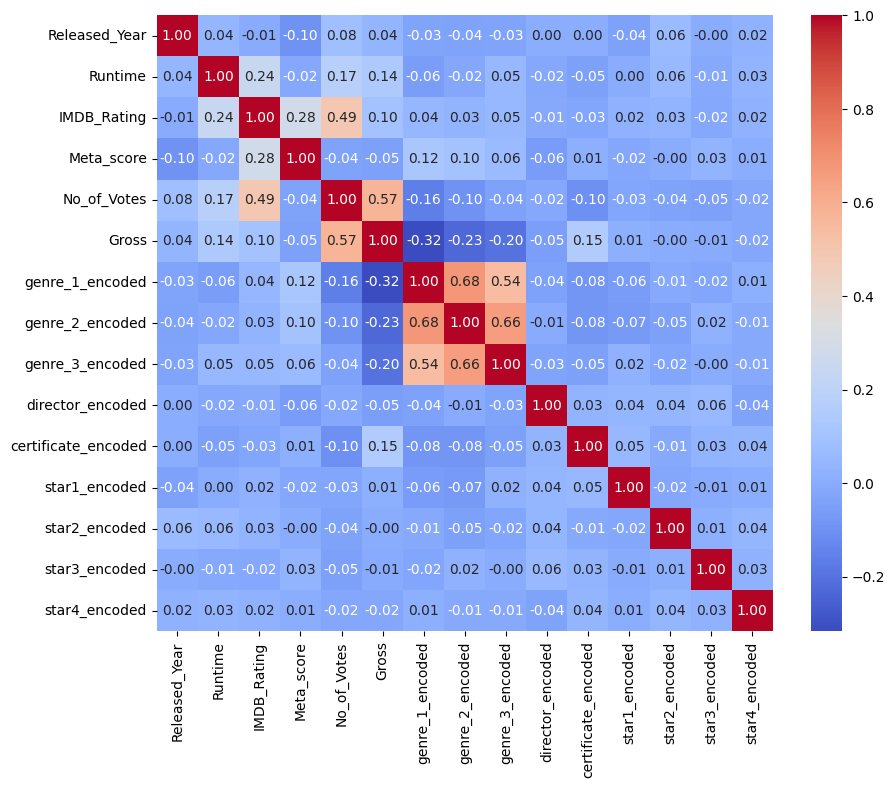

In [89]:
# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

plt.savefig('correlation_heatmap.png')

# Display the plot
plt.draw()

# Results

###

# Image of Genre Line Graph 

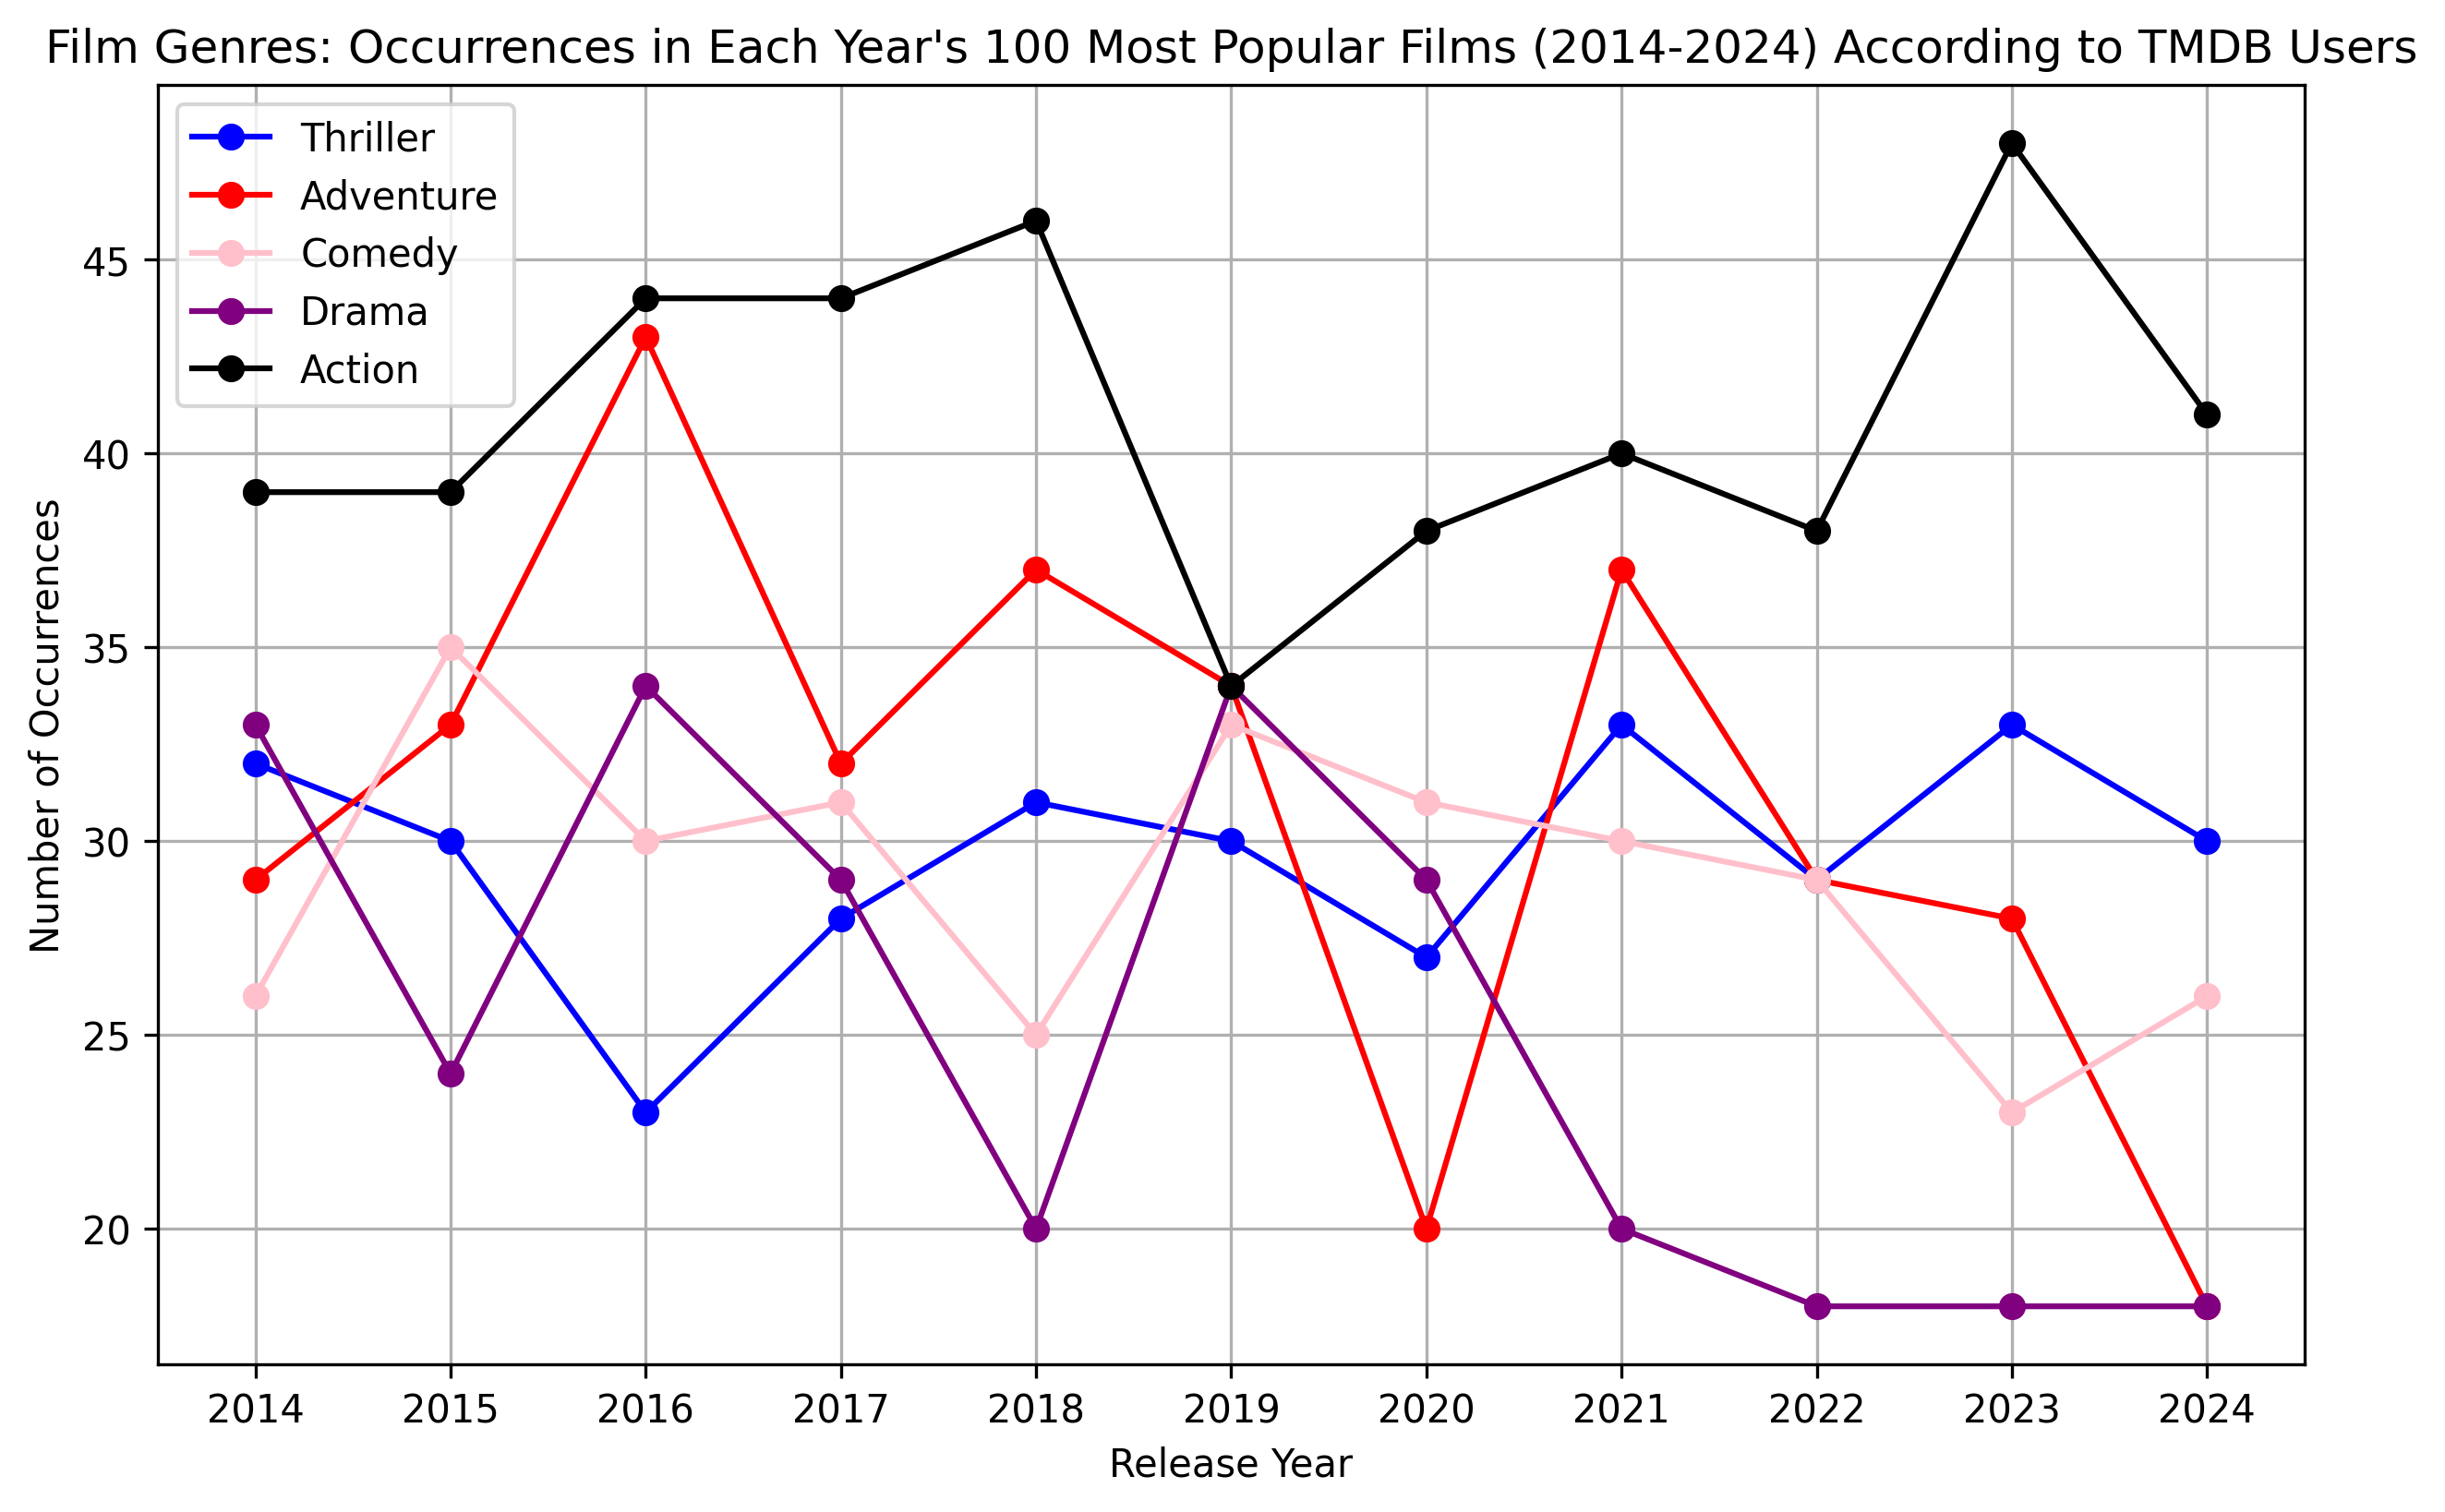

In [90]:
from IPython.display import Image, display

# Display the image
display(Image(filename='genre_line_graph.png'))

#### This line graph shows the 5 most common genres across the dataset from 2014 to 2024. Looking at the trends in the data, we can see that as a genre, Action is a continuing popular trend amongst users. Whereas there has been a significant reduction in the popularity of Drama and Adventure. Thriller and Comedy has remained stable over the last 10 years.












# Image of Popularity of Film Genres Scatter Graph

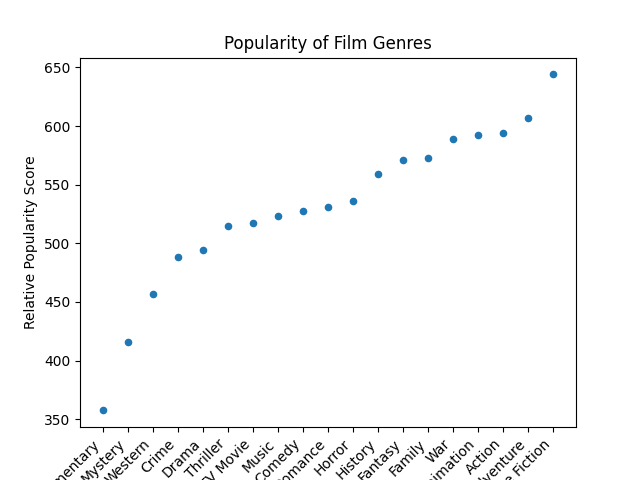

In [91]:
# Display the image
display(Image(filename='popularity_scatter_graph.png'))

#### This popularity scatter graph shows the relative popularity of different film genres by using a mean measure of each film's popularity rank. This scatter graph shows clearly the genres that have not been considered popular over the last 10 years, compared to the ones that have been a success. Science Fiction is the overall favourite, with Adventure and Action close behind. Documentaries are significantly lower in their score with Mysteries and Westerns not fairing well either. The majority of the genres fall within a 100 score range showing a steady incline in popularity.











# Image showing a bar chart of the popularity of actors by gender

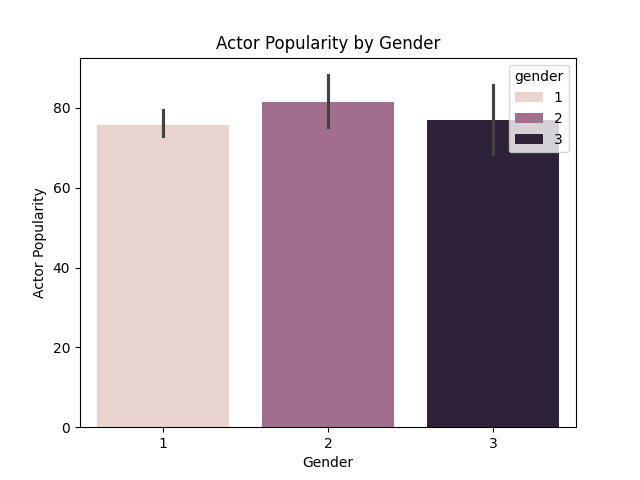

In [92]:
# Display the image
display(Image(filename='gender_popularity_bar.png'))

#### The actor popularity barplot takes data from users and measures the overall popularity based on gender. It is important to note that the data only included 2 Non-binary actors. The black lines in the centre of each bar represents the variability of the data and indicates the error or uncertainty in the reported measurement. From this, we can deduce that while overall, male actors are considered the most popular, there is very little between the three categories, and the lower margin of error is very close between male and female actors.

# Image showing genres over the last 100 years

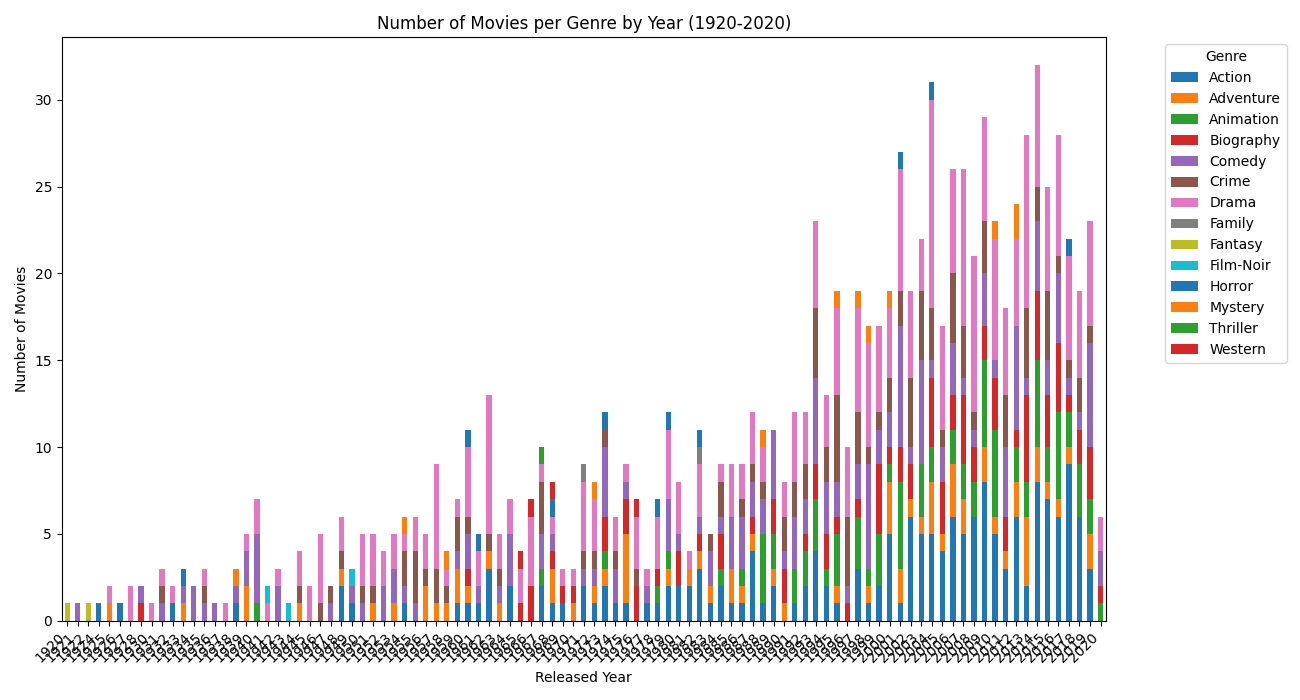

In [93]:
# Display the image
display(Image(filename='100_yr_barchart.png'))

#### Whilst we have been focussing on modern trends in movie data, an interesting perspective was identifying the genres released over the last 100 years. There has been an very steep incline in the number of movies produced each year, with many new genres gaining popularity. In the first few years, there were only one or two genres produced each year. As films were still a new concept, it would make sense that there were not many options available. However, in recent years we are producing around 7 different genres a year, and considerably more films every year.

# Image showing the stacked bar chart of films with their genres

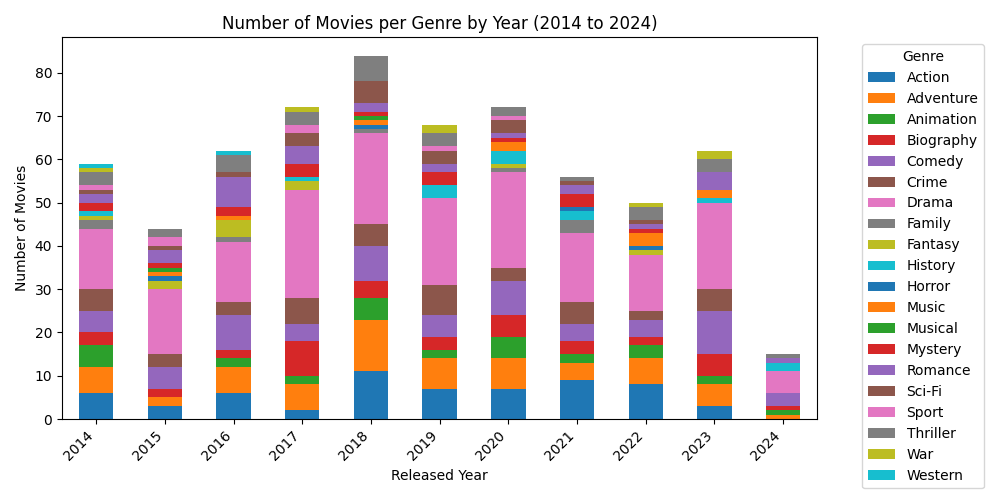

In [98]:
# Display the image
display(Image(filename='stacked_genre_bar.png'))

#### Going back to the more modern trends, this stacked bar chart shows the number of genres produced each year. We can see from this that Drama is a very consistent genre that film companies produce on a yearly basis. Looking at the popularity figures from TMDb, Science Fiction, Action and Adventure were the most popular genres from consumers. Whereas the most common productions were Drama, Comedy and Adventure. However, it is important to note, that we are only looking at the top 1000 movies produced over the last 100 years, meaning that the genres have already been filtered by popularity within IMDb's dataset. The popularity of Science Fiction within the TMDb dataset may be heavily influenced by the user preferences on that particular website.

# Images showing the comparison between run times and gross earnings

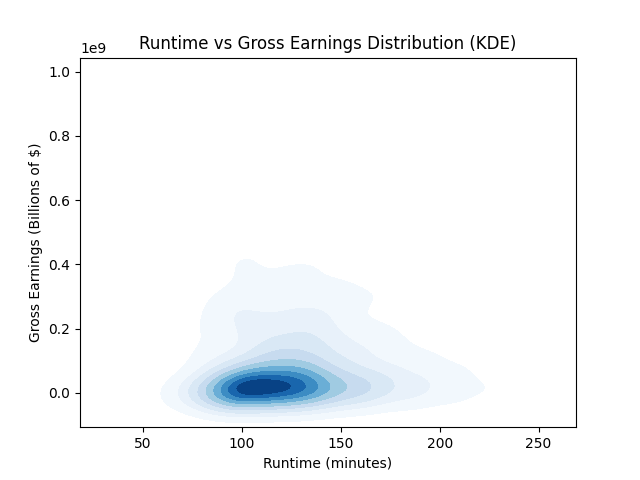

In [95]:
# Display the image
display(Image(filename='runtime_distribution.png'))

In [ ]:
# Display the image
display(Image(filename='runtime_scatter.png'))

#### The runtime vs gross earnings distribution shows that most of the films made are between 100 minutes and 125 minutes. The range in gross earnings also peaks within this time frame, suggesting to investors that this is the optimal length of film to be produced.

#### The scatter graph shows the same data with clearer identification points about outliers in the dataset. However, the overall trend mirrors that of the distribution graph, and the outliers would need investigating as to their success or failure.

# Image of the Correlation Heatmap

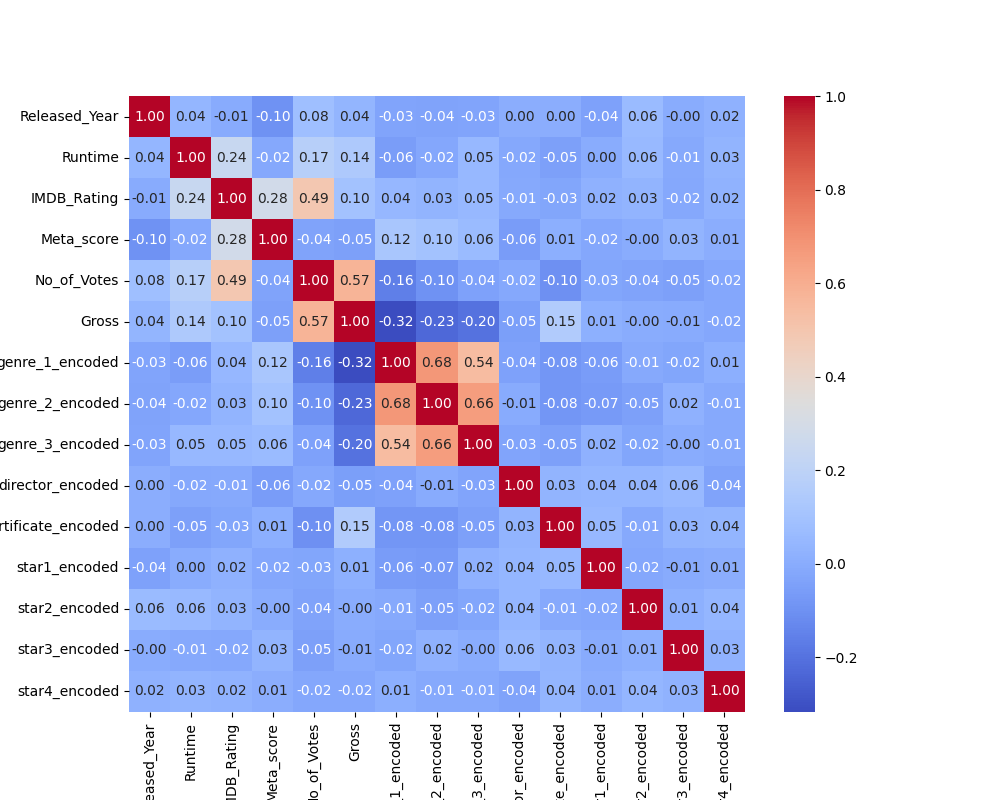

In [96]:
# Display the image
display(Image(filename='correlation_heatmap.png'))


#### Due to insufficient data, the negative correlation between genres and gross earnings has meant that we would have to investigate this further to understand the significance. Interestingly, the correlation between the age certificate of a film and it's gross earnings was only 15%, suggesting that it is a weak correlation and age certification is not necessarily a factor to consider when investing in a film. However, this would be something we would investigate further with more data provided. As investors are most interested in returns on their investment, we are focusing on the correlations associated with gross earnings. One interesting factor in this is that the star associated with a film has very little, if not no, correlation with the earning potential of a film.










